### Census Income project by Francis Afuwah
Batch DS2312

### Introduction/Overview
In the quest to understand economic disparities and opportunities within the United States, data scientists and researchers often turn to rich datasets like those provided by the Census Bureau. The dataset we explored here originates from the 1994 Census bureau database, a comprehensive collection that captures a wide array of socio-economic and demographic details about individuals. The primary objective of our analysis was to predict whether an individual earns more than $50K per year, a task that not only sheds light on economic status but also helps in understanding the factors that influence higher earnings in the population.

This dataset was meticulously prepared and included criteria to ensure a representative and clean set of data. The selection conditions used were: individuals older than 16 years, with adjusted gross income over $100, and working more than 0 hours per week, among other factors. These criteria help focus on a segment of the population actively engaged in the economy and thus more likely to show meaningful variance in income levels based on demographic and occupational factors.

The following steps provide a comprehensive overview of our analytical journey, starting from data exploration to detailed model evaluation, aiming to unpack the complex interplay of factors that lead to higher incomes. This exploration is not just about predicting economic outcomes but also about understanding the underlying dynamics that can inform policy decisions and personal career choices.

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

### 1. Data Exploration and Understanding
Initially, the dataset was loaded to understand its structure and the types of data it contained. The dataset included various socio-economic and demographic attributes such as age, work class, education, occupation, race, sex, hours worked per week, and others. Each record also included a binary income classification indicating whether the individual earns more or less than $50K per year.

In [2]:
# Load the data from the CSV file
file_path = "Census Income.csv"
census_data = pd.read_csv(file_path)

### 2. Exploratory Data Analysis (EDA)
An exploratory data analysis was conducted to visualize the distribution of key variables and their relationship with the income class. Through visualizations such as box plots and bar charts, findings are:

1. Older individuals generally have higher incomes.
2. Individuals working more hours per week tend to earn over USD 50K.
3. Higher educational attainments correlate with higher income brackets.
4. Certain occupations and work classes are more likely to exceed the $50K income threshold.
These insights helped to understand the factors that are potentially influential in predicting income levels.

### Viewing dataset

In [3]:
# Display the first few rows of the dataset
census_data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


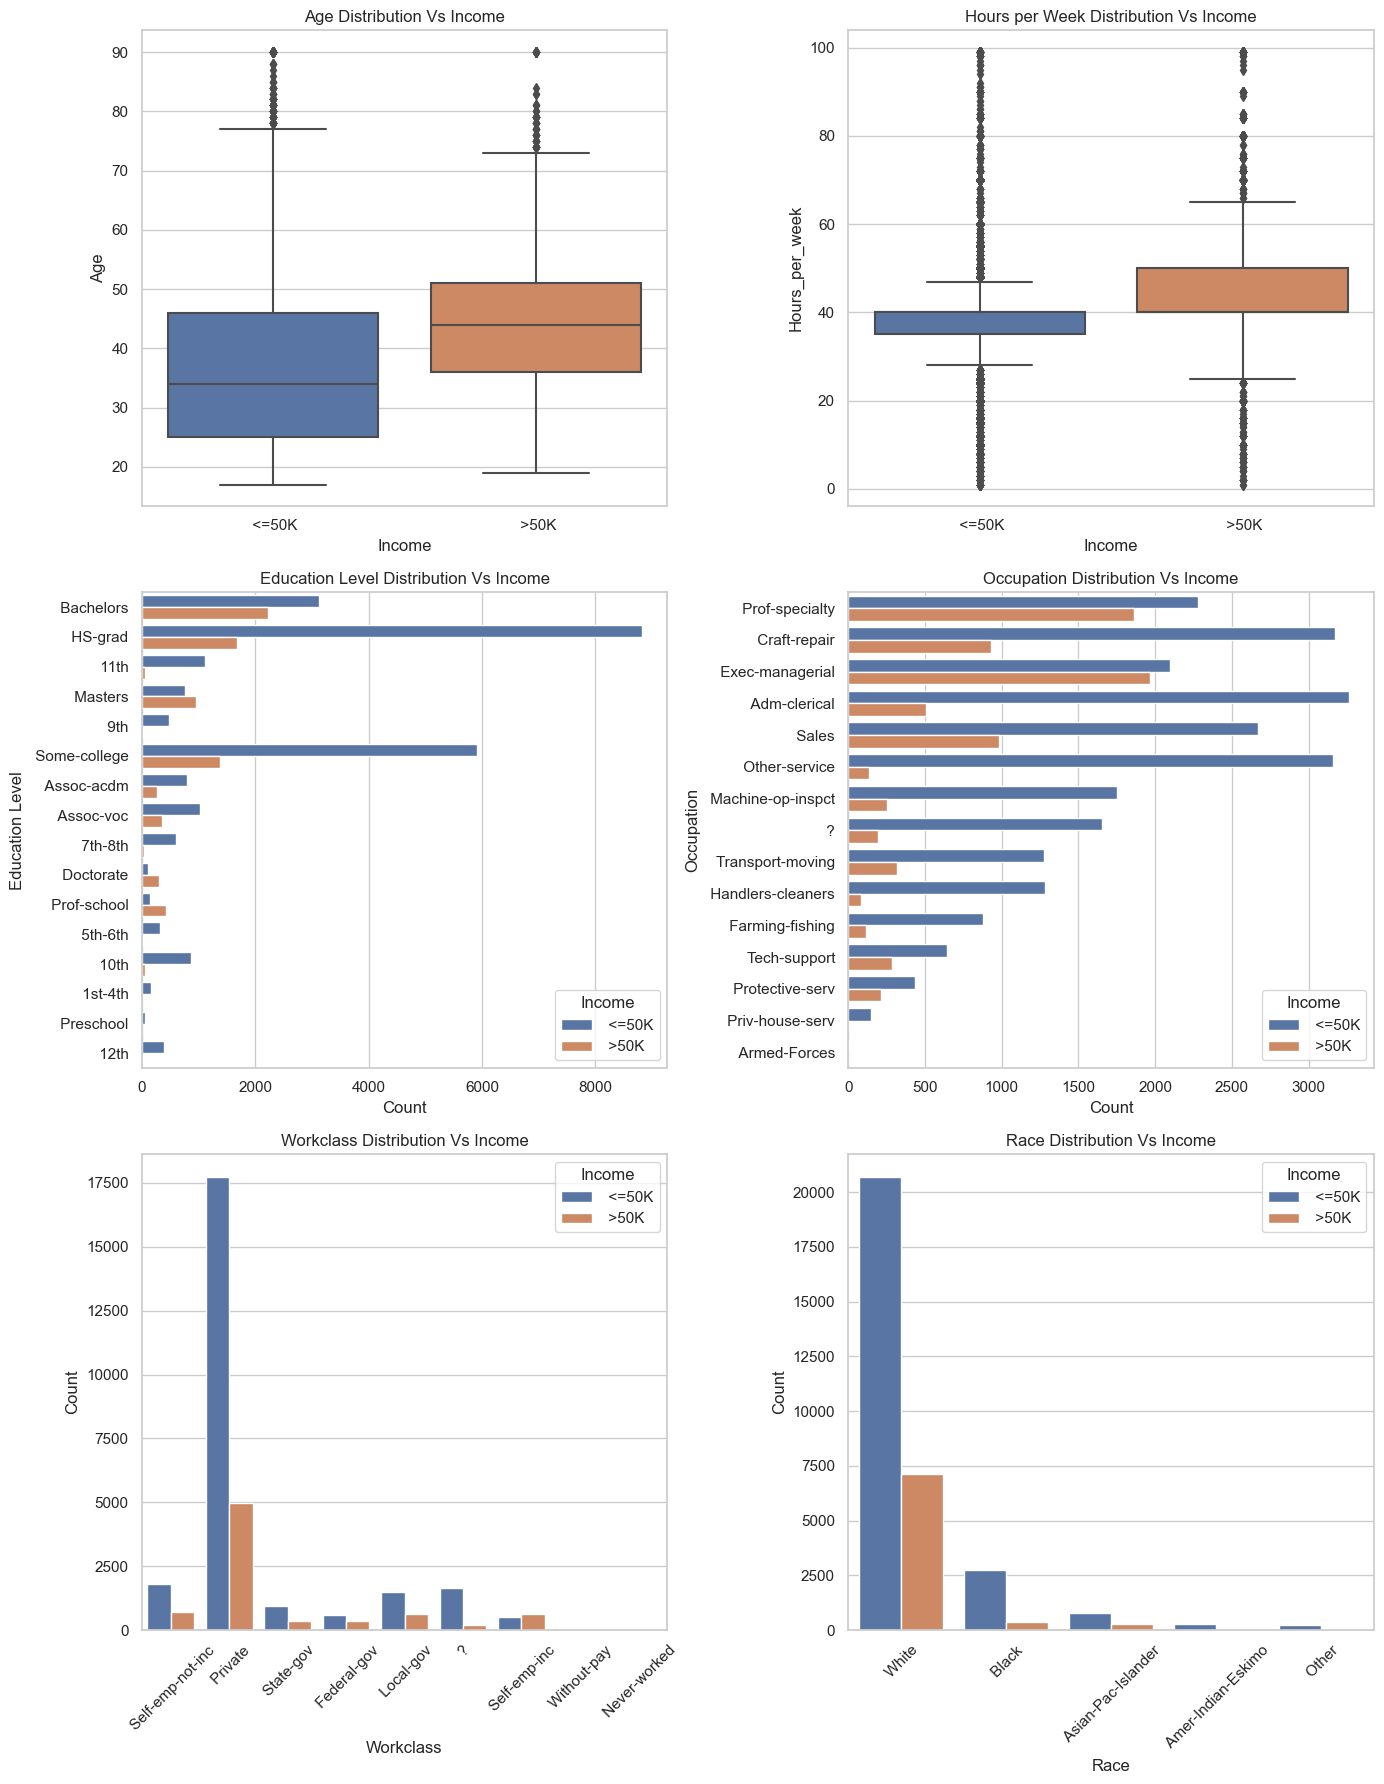

In [5]:
# Setting parameter for plots
sns.set(style="whitegrid")

# Creating a figure with several subplots
fig, axes = plt.subplots(3, 2, figsize=(14, 18))

# Age distribution Vs Income
sns.boxplot(ax=axes[0, 0], x='Income', y='Age', data=census_data)
axes[0, 0].set_title('Age Distribution Vs Income')

# Hours per week distribution Vs Income
sns.boxplot(ax=axes[0, 1], x='Income', y='Hours_per_week', data=census_data)
axes[0, 1].set_title('Hours per Week Distribution Vs Income')

# Education level distribution Vs Income
sns.countplot(ax=axes[1, 0], y='Education', hue='Income', data=census_data)
axes[1, 0].set_title('Education Level Distribution Vs Income')
axes[1, 0].set_xlabel('Count')
axes[1, 0].set_ylabel('Education Level')

# Occupation distribution Vs Income
sns.countplot(ax=axes[1, 1], y='Occupation', hue='Income', data=census_data, order=census_data['Occupation'].value_counts().index)
axes[1, 1].set_title('Occupation Distribution Vs Income')
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_ylabel('Occupation')

# Workclass distribution Vs Income
sns.countplot(ax=axes[2, 0], x='Workclass', hue='Income', data=census_data)
axes[2, 0].set_title('Workclass Distribution Vs Income')
axes[2, 0].set_xlabel('Workclass')
axes[2, 0].set_ylabel('Count')
axes[2, 0].tick_params(axis='x', rotation=45)

# Race distribution Vs Income
sns.countplot(ax=axes[2, 1], x='Race', hue='Income', data=census_data)
axes[2, 1].set_title('Race Distribution Vs Income')
axes[2, 1].set_xlabel('Race')
axes[2, 1].set_ylabel('Count')
axes[2, 1].tick_params(axis='x', rotation=45)

# Tight layout for plots
plt.tight_layout()
plt.show()

### 3. Data Preprocessing
To prepare the data for modeling,several preprocessing steps were performed:

1. Encoding Categorical Variables: Transformed categorical variables into a numerical format suitable for machine learning models.
2. Scaling Numerical Data: Standardized the numerical data to ensure that all features contribute equally to the model.
3. Data Splitting: The dataset was divided into training and testing sets to ensure that our model predictions would be validated on unseen data.

In [6]:
# Encoding categorical variables
categorical_cols = census_data.select_dtypes(include=['object']).columns
label_encoders = {col: LabelEncoder() for col in categorical_cols}
for col in categorical_cols:
    census_data[col] = label_encoders[col].fit_transform(census_data[col])

# Scaling numerical variables
numerical_cols = ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']
scaler = StandardScaler()
census_data[numerical_cols] = scaler.fit_transform(census_data[numerical_cols])

# Splitting the dataset into training and testing sets
X = census_data.drop('Income', axis=1)
y = census_data['Income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26048, 14), (6512, 14), (26048,), (6512,))

## Building models

### Initial Logistic Regression Model: 
1. The model performed decently, with an accuracy of around 82%, but had limitations in recall and precision.
2. Model Parameter Adjustment: To improve the model, we increased the number of iterations and adjusted the regularization strength, which slightly enhanced the precision but didn't substantially affect other metrics.
Seeing room for improvement, we then explored a more complex model.

### 1). Logistics Regression model

In [7]:
# Initialize and train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

C:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [8]:
# Predict on the testing set
y_pred = logistic_model.predict(X_test)

In [9]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, precision, recall, f1, conf_matrix

(0.8218673218673219,
 0.7052238805970149,
 0.4725,
 0.5658682634730539,
 array([[4596,  316],
        [ 844,  756]], dtype=int64))

## Adjusted model (Logistics Regression) 

In [10]:
# Adjust model parameters
logistic_model_improved = LogisticRegression(max_iter=500, C=0.5)
logistic_model_improved.fit(X_train, y_train)

# Predict on the testing set with the improved model
y_pred_improved = logistic_model_improved.predict(X_test)

# Evaluate the improved model
accuracy_improved = accuracy_score(y_test, y_pred_improved)
precision_improved = precision_score(y_test, y_pred_improved)
recall_improved = recall_score(y_test, y_pred_improved)
f1_improved = f1_score(y_test, y_pred_improved)
conf_matrix_improved = confusion_matrix(y_test, y_pred_improved)

accuracy_improved, precision_improved, recall_improved, f1_improved, conf_matrix_improved


(0.8201781326781327,
 0.7040913415794482,
 0.4625,
 0.5582798943794794,
 array([[4601,  311],
        [ 860,  740]], dtype=int64))

### 2). Random Forest classifier model
Random Forest Classifier: This model handles non-linear relationships better and is robust to outliers. After training, it showed improved accuracy (about 86%) and a better balance of precision and recall compared to logistic regression.

In [11]:
# Initialize and train the Random Forest classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Predict on the testing set with the Random Forest model
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

accuracy_rf, precision_rf, recall_rf, f1_rf, conf_matrix_rf


(0.8565724815724816,
 0.7452135493372607,
 0.6325,
 0.6842461122379987,
 array([[4566,  346],
        [ 588, 1012]], dtype=int64))

### 5. Feature Importance Analysis
Using the Random Forest model, to analyze the importance of each feature in predicting income levels. This analysis revealed that age, hours per week, education number, capital gain, and final weight are critical drivers of income predictions.

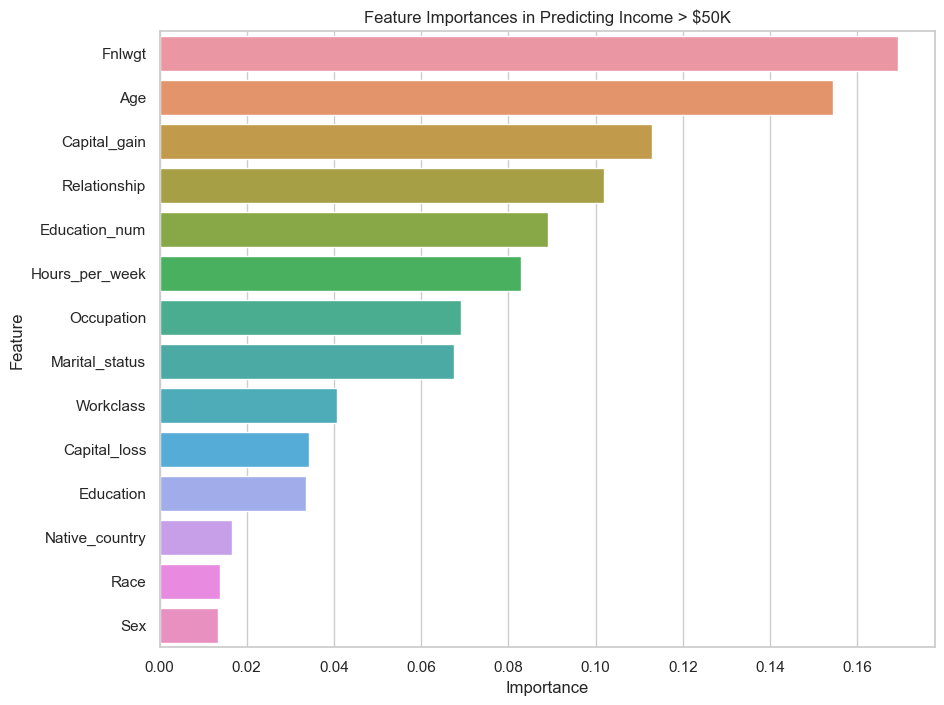

In [12]:
# Extract feature importances from the Random Forest model
feature_importances = random_forest_model.feature_importances_
feature_names = X.columns

# Create a DataFrame to hold feature names and their importance scores
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Feature Importances in Predicting Income > $50K')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### 6. Discussion
The feature importance analysis provided actionable insights that could guide further model refinements or be used to streamline the model by focusing on the most impactful features.

### Conclusion
Through systematic exploration, preprocessing, modeling, and analysis, we gained valuable insights into the factors that predict whether individuals earn more than $50K per year. These insights can inform further data-driven decisions and model optimizations.